In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics 
import seaborn as sns 
import numpy as np
import TransformScript as ts

In [2]:
crimes = pd.DataFrame()
crimes = ts.run(crimes, 'data/Crime_Data_2010_2017.csv')
#print(crimes)

In [3]:
crimes = crimes[:len(crimes)//100]

In [4]:
''''Morning: 5am - 11:59am         0500 - 1159
    Afternoon: 12pm - 4:59pm       1200 - 1659
    Evening: 5:00pm - 8:59pm       1700 - 2059 
    Night: 9:00pm - 4:59am         2100 - 0459'''    

crimesTime = crimes['Time Occurred']
crimesTimeName = []
mornCount = 0
afterCount = 0
evenCount = 0
nightCount = 0
#set each time to morning, afternoon, evening or night 

for i in crimesTime:
    if i in range(500, 1159):
        crimesTimeName.append("Morning")
        mornCount += 1
    elif i in range(1200,1659):
        crimesTimeName.append("Afternoon")
        afterCount += 1
    elif i in range(1700, 2059):
        crimesTimeName.append("Evening")
        evenCount += 1
    elif i in range(2100, 2400) or i in range(0, 459):
        crimesTimeName.append("Night")
        nightCount += 1
    else:
        crimesTimeName.append("NaN")

crimes['Time of Day'] = crimesTimeName

#print(len(crimes))
#print((crimesTime))

print('Crimes committed in the morning:',mornCount)
print('Crimes committed in the afternoon:',afterCount)
print('Crimes committed in the evening:',evenCount)
print('Crimes committed in the night:',nightCount)

Crimes committed in the morning: 3303
Crimes committed in the afternoon: 4113
Crimes committed in the evening: 3639
Crimes committed in the night: 4788


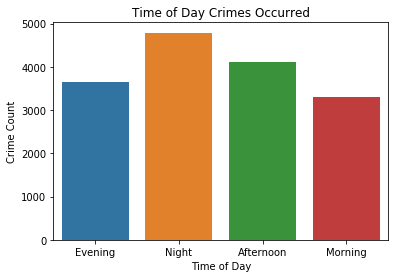

In [5]:
sns.countplot(crimes['Time of Day'], label = 'count')
plt.xlabel('Time of Day')
plt.ylabel('Crime Count')
plt.title("Time of Day Crimes Occurred")
plt.show()

In [6]:
#target = crimes.dropna()

In [7]:
target = crimes.drop(columns = ['Time of Day','Time Occurred'])
target.head()

,Longitude,Latitude,Timestamp,Area Name_Central,Area Name_Devonshire,Area Name_Foothill,Area Name_Harbor,Area Name_Hollenbeck,Area Name_Hollywood,Area Name_Mission,...,Crime Code 4_745.0,Crime Code 4_821.0,Crime Code 4_860.0,Crime Code 4_910.0,Crime Code 4_930.0,Crime Code 4_944.0,Crime Code 4_946.0,Crime Code 4_998.0,Crime Code 4_999.0,Crime Code 4_nan
0,33.9829,-118.3338,1362960000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34.0454,-118.3157,1264118400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.9420,-118.2717,1363564800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.9572,-118.2717,1289347200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,34.2009,-118.6369,1388793600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
y = crimesTimeName

In [9]:
X_train, X_test, y_train, y_test = train_test_split(target, y, test_size = 0.2, random_state=0)

In [10]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier with k = 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2940990848848217


In [12]:
# Import confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[315 201 134 159]
 [244 204 104 159]
 [241 153 124 165]
 [311 229 137 289]]
              precision    recall  f1-score   support

   Afternoon       0.28      0.39      0.33       809
     Evening       0.26      0.29      0.27       711
     Morning       0.25      0.18      0.21       683
       Night       0.37      0.30      0.33       966

   micro avg       0.29      0.29      0.29      3169
   macro avg       0.29      0.29      0.29      3169
weighted avg       0.30      0.29      0.29      3169



In [ ]:
k = 0
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(k,"Accuracy:",metrics.accuracy_score(y_test, y_pred))

References:
https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [41]:
crimes2 = pd.read_csv('data/Crime_Data_2010_2017.csv')
crimes2 = crimes2[:len(crimes2)//100]
weapons = crimes2['Weapon Used Code']

nonViolentCount = 0
violent = []
violentCount = 0

for i in weapons:
    if i in range(100, 1000):
        violentCount += 1
        violent.append("Violent")
    else:
        nonViolentCount += 1
        violent.append("Non-Violent")

crimes['Violence'] = violent
del crimes2

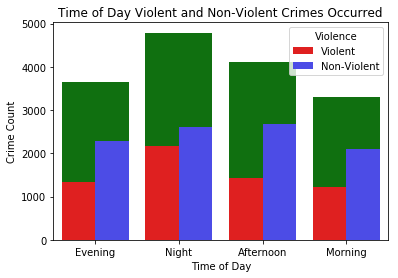

In [42]:
violent = crimes[crimes['Violence'] == "Violent"]
nonviolent = crimes[crimes['Violence'] == "Non-violent"]
sns.countplot(x = "Time of Day", color = "green", data = crimes)
sns.countplot(x = "Time of Day", hue = "Violence", palette = {"Violent": "#FF0000", "Non-Violent": "#3333FF"}, data = crimes)
plt.ylabel("Crime Count")
plt.title("Time of Day Violent and Non-Violent Crimes Occurred")
plt.show()